In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, Input, Lambda, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.utils import plot_model, to_categorical
from tensorflow.keras.datasets import cifar10
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline

import random

In [2]:
(X_train, t_train),(X_test, t_test) = cifar10.load_data()
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

print(X_train.shape, t_train.shape)
print(X_test.shape, t_test.shape)
print(type(X_test))
print(type(t_test[0]))

X_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples
(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


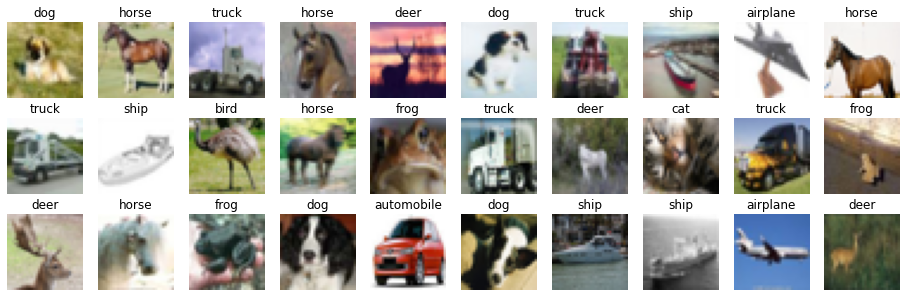

In [ ]:
# No method on keras to get cifar10 category label name by categoly label?
cifar10_labels = np.array([
    'airplane',
    'automobile',
    'bird',
    'cat',
    'deer',
    'dog',
    'frog',
    'horse',
    'ship',
    'truck'])

pos = 1
#index = 0
index = random.randint(0, X_test.shape[0]/2)
i = index


# plt figure set to 16inch x 16inch(1600pixel x 1600 pixel). 
plt.figure(figsize=(16,5))

# draw cifar10 images and label names
for img in X_test[index:index+30]:
    plt.subplot(3, 10, pos)
    plt.imshow(img)
    plt.axis('off')
    plt.title( cifar10_labels[t_test[i][0]] )
    pos += 1
    i += 1

plt.show()

In [3]:
# floatに型変換
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# 各画素値を 0-1 に正規化
X_train /= 255.0
X_test /= 255.0

# クラス分けの数に one-hot-vector 表現に
classes = 10
t_train = to_categorical(t_train, classes)
t_test = to_categorical(t_test, classes)


In [4]:
# モデルの定義
model1 = Sequential()

# 第一層（入力層）
model1.add(Conv2D(32,3,input_shape=(32,32,3)))
model1.add(Activation('relu'))

# 第二層（中間層）
model1.add(Conv2D(32,3))
model1.add(Activation('relu'))
model1.add(MaxPool2D(pool_size=(2,2)))

# 第三層（中間層）
model1.add(Conv2D(64,3))
model1.add(Activation('relu'))
model1.add(MaxPool2D(pool_size=(2,2)))

# 第四層（出力層）
model1.add(Flatten())
model1.add(Dense(1024))
model1.add(Activation('relu'))

model1.add(Dense(classes, activation='softmax'))

adam = optimizers.Adam(lr=1e-4)

model1.compile(optimizer=adam, loss='categorical_crossentropy', metrics=["accuracy"])

In [9]:
history1 = model1.fit(X_train, t_train, batch_size=128, epochs=10, verbose=1, validation_split=0.1)

Epoch 1/10
352/352 [==============================] - 2s 6ms/step - loss: 0.9137 - accuracy: 0.6864 - val_loss: 0.9864 - val_accuracy: 0.6588
Epoch 2/10
352/352 [==============================] - 2s 6ms/step - loss: 0.8811 - accuracy: 0.6978 - val_loss: 1.0369 - val_accuracy: 0.6354
Epoch 3/10
352/352 [==============================] - 2s 6ms/step - loss: 0.8511 - accuracy: 0.7080 - val_loss: 0.9367 - val_accuracy: 0.6764
Epoch 4/10
352/352 [==============================] - 2s 6ms/step - loss: 0.8272 - accuracy: 0.7182 - val_loss: 0.9456 - val_accuracy: 0.6740
Epoch 5/10
352/352 [==============================] - 2s 6ms/step - loss: 0.7961 - accuracy: 0.7282 - val_loss: 0.9180 - val_accuracy: 0.6870
Epoch 6/10
352/352 [==============================] - 2s 6ms/step - loss: 0.7723 - accuracy: 0.7364 - val_loss: 0.8995 - val_accuracy: 0.6954
Epoch 7/10
352/352 [==============================] - 2s 6ms/step - loss: 0.7438 - accuracy: 0.7467 - val_loss: 0.8898 - val_accuracy: 0.6994
Epoch 

In [11]:
# inputs = Input(shape=(224, 224, 3))
inputs = Input(shape=(32, 32, 3))
# Due to memory limitation, images will resized on-the-fly.
x = Lambda(lambda image: tf.image.resize(image, (224, 224)))(inputs)
x = Conv2D(64, (3, 3), activation='relu', padding='same', name='block1_conv1')(inputs)
x = Conv2D(64, (3, 3), activation='relu', padding='same', name='block1_conv2')(x)
x = MaxPooling2D((2, 2), strides=(2, 2), padding='same', name='block1_pool')(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv1')(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv2')(x)
x = MaxPooling2D((2, 2), strides=(2, 2), padding='same', name='block2_pool')(x)
x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv1')(x)
x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv2')(x)
x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv3')(x)
x = MaxPooling2D((2, 2), strides=(2, 2), padding='same', name='block3_pool')(x)
x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv1')(x)
x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv2')(x)
x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv3')(x)
x = MaxPooling2D((2, 2), strides=(2, 2), padding='same', name='block4_pool')(x)
x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv1')(x)
x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv2')(x)
x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv3')(x)
x = MaxPooling2D((2, 2), strides=(2, 2), padding='same', name='block5_pool')(x)
flattened = Flatten(name='flatten')(x)
x = Dense(4096, activation='relu', name='fc1')(flattened)
x = Dropout(0.5, name='dropout1')(x)
x = Dense(4096, activation='relu', name='fc2')(x)
x = Dropout(0.5, name='dropout2')(x)
# CIFAR10は10クラスなので出力の数が違う
predictions = Dense(10, activation='softmax', name='predictions')(x)


BATCH_SIZE = 256
sgd = optimizers.SGD(lr=0.01,
                     momentum=0.9,
                     decay=5e-4)#, nesterov=False)

model2 = Model(inputs=inputs, outputs=predictions)


model2.compile(optimizer=sgd,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
history2 = model2.fit(X_train, t_train, batch_size=BATCH_SIZE, epochs=10, verbose=1,
              validation_data=(X_test, t_test))

Epoch 1/10
196/196 [==============================] - 13s 68ms/step - loss: 2.3027 - accuracy: 0.1001 - val_loss: 2.3024 - val_accuracy: 0.1000
Epoch 2/10
196/196 [==============================] - 13s 64ms/step - loss: 2.3021 - accuracy: 0.1063 - val_loss: 2.3007 - val_accuracy: 0.1597
Epoch 3/10
196/196 [==============================] - 13s 65ms/step - loss: 2.2824 - accuracy: 0.1583 - val_loss: 2.2039 - val_accuracy: 0.1661
Epoch 4/10
196/196 [==============================] - 13s 65ms/step - loss: 2.1147 - accuracy: 0.1909 - val_loss: 2.0422 - val_accuracy: 0.21513s - loss: - ETA: 3s - loss: 2.1286 - accuracy: 0.18 - ETA - ETA: 0s - loss: 2.1170 - ac
Epoch 5/10
196/196 [==============================] - 13s 65ms/step - loss: 1.9878 - accuracy: 0.2184 - val_loss: 1.8947 - val_accuracy: 0.2341
Epoch 6/10
196/196 [==============================] - 13s 65ms/step - loss: 1.8791 - accuracy: 0.2498 - val_loss: 1.8287 - val_accuracy: 0.2689A: 11s - loss: 1.9093  - ETA: 10s - loss: 1.9070


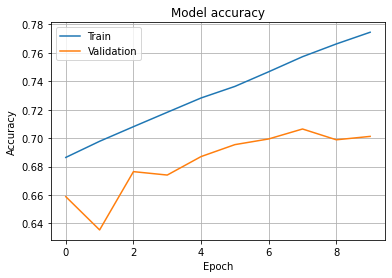

In [10]:
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.grid()
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

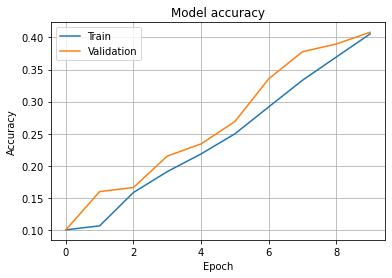

In [13]:
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.grid()
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()